Goal
Write a program to calculate the near and far‐field diffraction patterns of an arbitrary one‐dimensional complex aperture using the Fast Fourier Transform technique. Test this program by using simple test apertures (a slit) for which the theoretical pattern is known. Investigate more complicated apertures for which analytical results are difficult to compute.

**CORE TASK 1:**

<ipython-input-16-bef501020ce0>:42: RuntimeWarning: invalid value encountered in divide
  theo_I_slit = (np.sin(factor) / factor + epsilon)**2


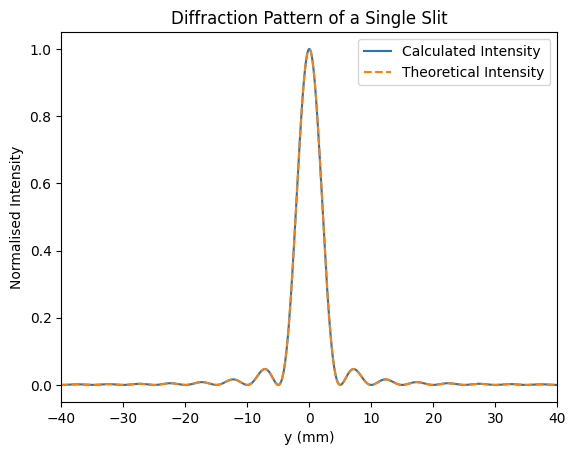

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_diffraction_pattern(d, L, wavelength, D, N, aperture):
    # FFT of the aperture function
    aperture_fft = np.fft.fft(aperture)
    frequencies = np.fft.fftfreq(N, dx)
    aperture_fft_shifted = np.fft.fftshift(aperture_fft)
    frequencies_shifted = np.fft.fftshift(frequencies)

    # Convert frequencies to screen coordinates
    y_values = frequencies_shifted * wavelength * D

    # Intensity pattern in the far field
    I_pattern = np.abs(aperture_fft_shifted)**2

    # Normalise to central maximum
    max_I = I_pattern[int(N / 2)]
    I = I_pattern / max_I if max_I != 0 else np.zeros_like(I_pattern)

    return y_values, I

# Parameters
wavelength = 500e-9
d = 100e-6
D = 1.0
L = 5e-3
N = 4096

dx = L / N
x = np.linspace(-L / 2, L / 2, N)

aperture_slit = np.where(np.abs(x) <= d / 2, 1, 0)

# Calculate diffraction pattern
y_values_slit, I_slit = calculate_diffraction_pattern(d, L, wavelength, D, N, aperture_slit)

epsilon = 1e-10  # Avoid division by zero with sinc function

# Theoretical intensity pattern
factor = np.pi * d * y_values_slit / (wavelength * D)
theo_I_slit = (np.sin(factor) / factor + epsilon)**2

plt.plot(y_values_slit * 1e3, I_slit, label='Calculated Intensity')
plt.plot(y_values_slit * 1e3, theo_I_slit, label='Theoretical Intensity', linestyle='--')
plt.xlabel('y (mm)')
plt.ylabel('Normalised Intensity')
plt.title('Diffraction Pattern of a Single Slit')
plt.legend()
y_range = 0.04
plt.xlim(-y_range * 1e3, y_range * 1e3)
plt.show()

**CORE TASK 1: CONCLUSIONS**
- the FFT plot perfectly aligns with the theoretical expected sinc function, upon normalisation.
- the scaling in the far-field is also correct, with the first and successive minima located in the correct screen coordinates.

**CORE TASK 2:**

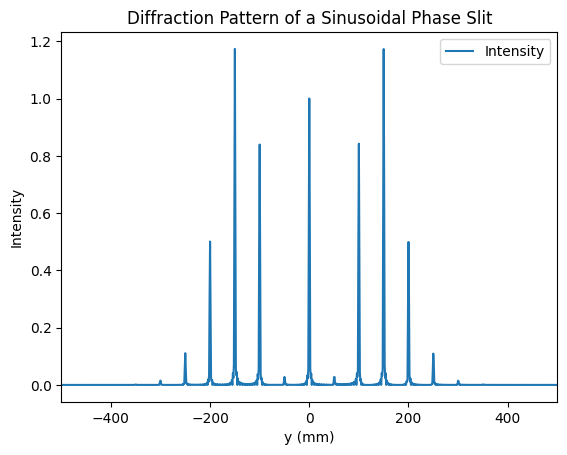

In [17]:
d = 2e-3
D = 10.0
m = 8
s = 100e-6

phi = (m / 2) * np.sin(2 * np.pi * x / s)
aperture_grating = np.where(np.abs(x) <= d / 2, np.exp(1j * phi), 0)

y_values_grating, I_grating = calculate_diffraction_pattern(d, L, wavelength, D, N, aperture_grating)
plt.plot(y_values_grating * 1e3, I_grating, label='Intensity')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.title('Diffraction Pattern of a Sinusoidal Phase Slit')
plt.legend()
y_range = 0.5
plt.xlim(-y_range * 1e3, y_range * 1e3)
plt.show()

**CORE TASK 2: CONCLUSIONS**
- The sinusoidal phase slits gives a series of equally-spaced sharp peaks with a complex envelope.
- Of note, the global maxima are not central, but rather approximately 150mm from the centre.
- This is in accordance with experimental results *(Bergman, A. (2011) Phase non-linearity measurement and correction of an acousto-optic scanner)*

**CORE TASK 3:**

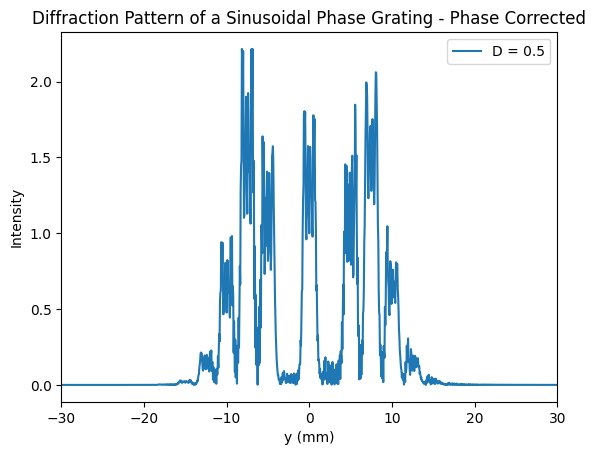

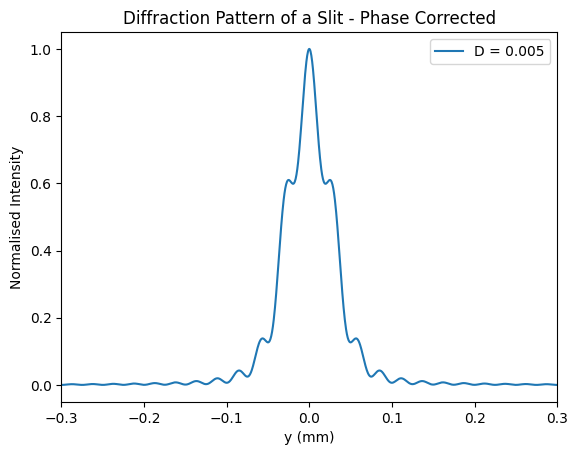

In [18]:
k = 2*np.pi/wavelength

D = 0.5
d = 2e-3
phi = (m / 2) * np.sin(2 * np.pi * x / s)
aperture_grating = np.where(np.abs(x) <= d / 2, np.exp(1j * phi), 0)
aperture_grating_near = aperture_grating * np.exp(1j * k * x**2 / (2 * D))

y_values_grating_near, I_grating_near = calculate_diffraction_pattern(d, L, wavelength, D, N, aperture_grating_near)

plt.plot(y_values_grating_near * 1e3, I_grating_near, label=f'D = {D}')
plt.xlabel('y (mm)')
plt.ylabel('Intensity')
plt.title('Diffraction Pattern of a Sinusoidal Phase Grating - Phase Corrected')
plt.legend()
y_range = 0.03
plt.xlim(-y_range * 1e3, y_range * 1e3)
plt.show()

D = 0.005
d = 100e-6
aperture_slit = np.where(np.abs(x) <= d / 2, 1, 0)
aperture_slit_near = aperture_slit * np.exp(1j * k * x**2 / (2 * D))

y_values_slit_near, I_slit_near = calculate_diffraction_pattern(d, L, wavelength, D, N, aperture_slit_near)

plt.plot(y_values_slit_near * 1e3, I_slit_near, label=f'D = {D}')
plt.xlabel('y (mm)')
plt.ylabel('Normalised Intensity')
plt.title('Diffraction Pattern of a Slit - Phase Corrected')
plt.legend()
y_range = 3e-1
plt.xlim(-y_range, y_range)
plt.show()

**CORE TASK 3: CONCLUSIONS**
- Near field modification produces similar but notably different diffraction patterns. The results are sensible, and have overall similar shapes to the original patterns.
- Near-field effects are characterised by more complex intensity patterns compared to the far-field effects, which often display clear minima and maxima.
- This is what is seen.
- The phase grating has a more complex fine structure now, with no more sharp, defined peaks are before. There are still wider peaks with roughly the same relative spatial distribution.
- The single slit no longer has clear maxima and minima in its pattern. This pattern is as expected and is characteristic of the transition region between the near and far fields (Norouzpour, M. (2017). The development of self-interference of split HOLZ (SIS-HOLZ) lines for measuring z-dependent atomic displacement in crystals).


**SUPPLEMENTARY TASK 1:**

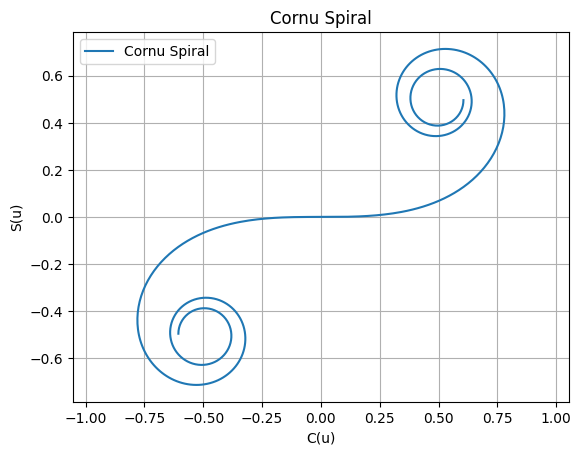

In [19]:
from scipy.integrate import quad

# Define the Fresnel integrals
def C(u):
    return quad(lambda x: np.cos(np.pi * x**2 / 2), 0, u)[0]

def S(u):
    return quad(lambda x: np.sin(np.pi * x**2 / 2), 0, u)[0]

# Evaluate the Fresnel integrals over a range
u_values = np.linspace(-3, 3, 500)
C_values = np.array([C(u) for u in u_values])
S_values = np.array([S(u) for u in u_values])

# Plot the Cornu spiral
plt.plot(C_values, S_values, label='Cornu Spiral')
plt.xlabel('C(u)')
plt.ylabel('S(u)')
plt.title('Cornu Spiral')
plt.axis('equal') # Equal aspect ratio, for clarity
plt.grid(True)
plt.legend()
plt.show()

**SUPPLEMENTARY TASK 1: CONCLUSIONS**
- Neat spiral displayed, as expected in line with theory.
- Centres of spiral located at (-0.5, -0.5) & (0.5, 0.5) as expected.

**SUPPLEMENTARY TASK 2:**

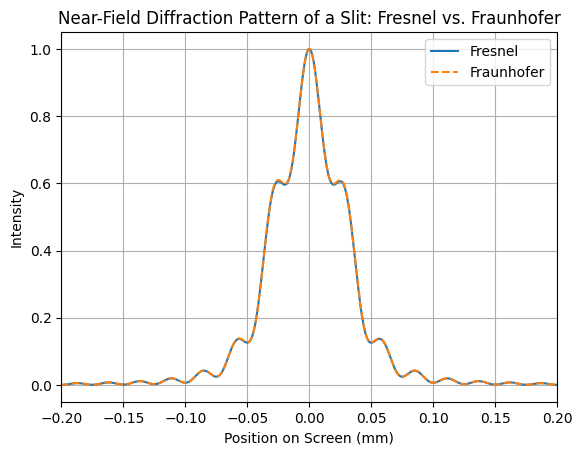

In [20]:
scale_factor = np.sqrt(2 / (wavelength * D))
wavelength = 500e-9
D = 5e-3
d = 100e-6
y_extent = 5e-4 # must be chosen appropriately to give accurate pattern
# causes issues with quad function if too large

def complex_amplitude(x0, x1):
    u0 = x0 * scale_factor
    u1 = x1 * scale_factor
    C_diff = C(u1) - C(u0)
    S_diff = S(u1) - S(u0)
    return (C_diff + 1j * S_diff)

# Evaluating diffraction pattern using Fresnel integral
# Varying the integration limits to acheive off-centre pattern
y_values_fresnel = np.linspace(-y_extent / 2, y_extent / 2, 500)
I_fresnel_pattern = [np.abs(complex_amplitude(y - d / 2, y + d / 2))**2 for y in y_values_fresnel]
max_I_fresnel = max(I_fresnel_pattern)
I_fresnel = I_fresnel_pattern/ max_I_fresnel

plt.plot(y_values_fresnel * 1e3, I_fresnel, label='Fresnel')
plt.plot(y_values_slit_near* 1e3, I_slit_near, label='Fraunhofer', linestyle='--')
plt.xlabel('Position on Screen (mm)')
plt.ylabel('Intensity')
plt.title('Near-Field Diffraction Pattern of a Slit: Fresnel vs. Fraunhofer')
plt.grid(True)
plt.legend()
y_range = 2e-1
plt.xlim(-y_range, y_range)
plt.show()

**SUPPLEMENTARY TASK 2: CONCLUSIONS**
- Excellent agreement between near-field Fraunhofer, and Fresnel calculations, upon normalisation to central maximum.
- Scaling with respect to screen coordinates also in agreement.
- Suggests that both methods are highly accurate.